In [1]:
import numpy as np
import pandas as pd
import tensorly as tl
from tensorly.decomposition import parafac, non_negative_parafac
from sklearn.datasets import fetch_mldata
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

/Users/berton/miniconda3/envs/tensors/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
mnist = fetch_mldata('MNIST original')
target = pd.Series(mnist.target, dtype=int)
target = target.sort_values()
data = mnist.data[target.index]
target = target.values
data.shape, target.shape

((70000, 784), (70000,))

39149 5


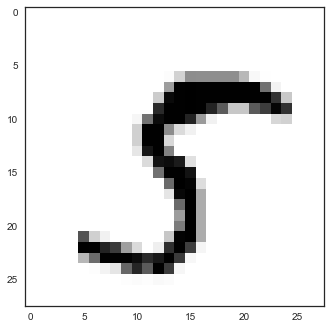

In [3]:
i = np.random.choice(range(data.shape[0]), 1)[0]
print(i, target[i])
with sns.axes_style('white'):
    plt.imshow(data[i].reshape(28, 28))

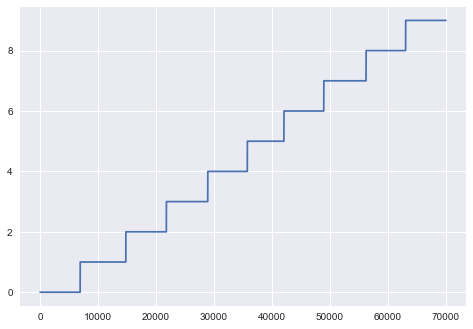

In [4]:
plt.plot(target)

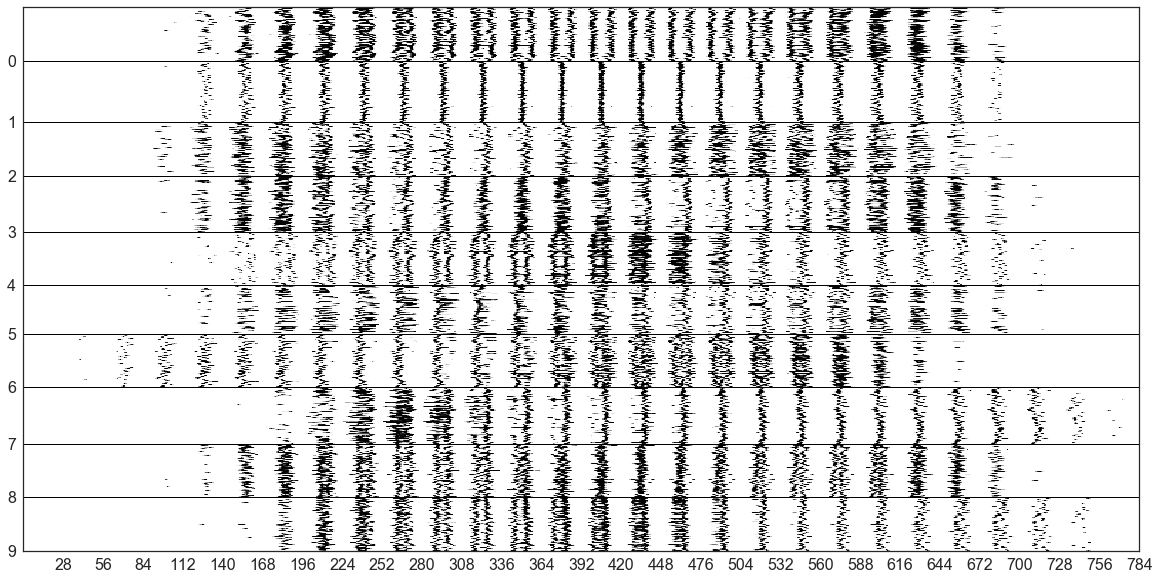

In [5]:
xticks = range(28, 785, 28)
yticks = pd.Series(target).value_counts().sort_index().values.cumsum()
with sns.axes_style('white'):
    fig = plt.figure(figsize=(20, 10))
    plt.imshow(data, aspect='auto', interpolation='nearest')#, cmap='hot')
    ax = plt.gca()
    ax.tick_params(labelsize=16)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_yticklabels(range(10))
    ax.grid(True, axis='y', color='k', alpha=1, linewidth=1)    

# matrix factorization

In [6]:
k = 10

In [7]:
%time factors_2 = non_negative_parafac(data, k, verbose=1)

reconstruction error=17.17173983078055, variation=0.1902102732095976.
reconstruction error=16.92158772474059, variation=0.25015210603995897.
reconstruction error=16.617242254672124, variation=0.3043454700684656.
reconstruction error=16.29344233678048, variation=0.32379991789164464.
reconstruction error=15.985550806298985, variation=0.30789153048149487.
reconstruction error=15.71145206329865, variation=0.27409874300033543.
reconstruction error=15.477187943105102, variation=0.23426412019354714.
reconstruction error=15.281999057504818, variation=0.19518888560028458.
reconstruction error=15.120858933326371, variation=0.1611401241784467.
reconstruction error=14.987526165071111, variation=0.13333276825525964.
reconstruction error=14.87633135376769, variation=0.11119481130342201.
reconstruction error=14.782581392906165, variation=0.09374996086152443.
reconstruction error=14.702598127682633, variation=0.07998326522353238.
reconstruction error=14.633634760226155, variation=0.0689633674564778.
r

In [8]:
W = factors_2[0]
H = factors_2[1]
W.shape, H.shape

((70000, 10), (784, 10))

In [9]:
scales = H.max(axis=0) / 255
H /= scales
W *= scales
W.max(), H.max()

(1.629957180101403, 255.00000000000003)

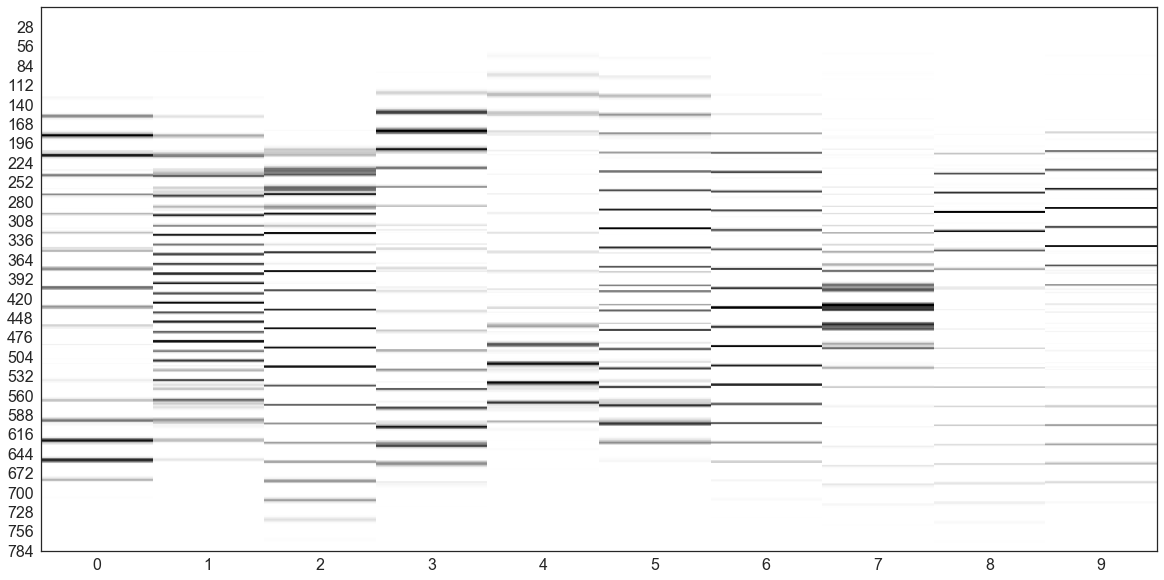

In [10]:
with sns.axes_style('white'):
    fig = plt.figure(figsize=(20, 10))
    plt.imshow(H, aspect='auto', interpolation='nearest')#, cmap='hot')
    ax = plt.gca()
    ax.tick_params(labelsize=16)
    ax.set_xticks(range(10))
    ax.set_yticks(xticks)

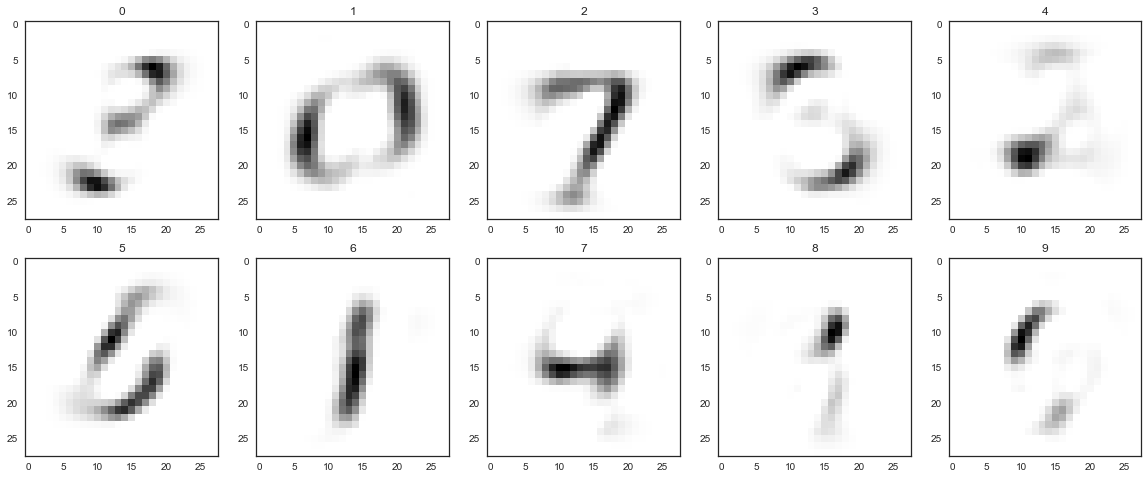

In [11]:
with sns.axes_style('white'):
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    for i, (factor, ax) in enumerate(zip(H.T, axes.flatten())):
        ax.imshow(factor.reshape(28, 28), aspect='auto')
        ax.set_title(i)

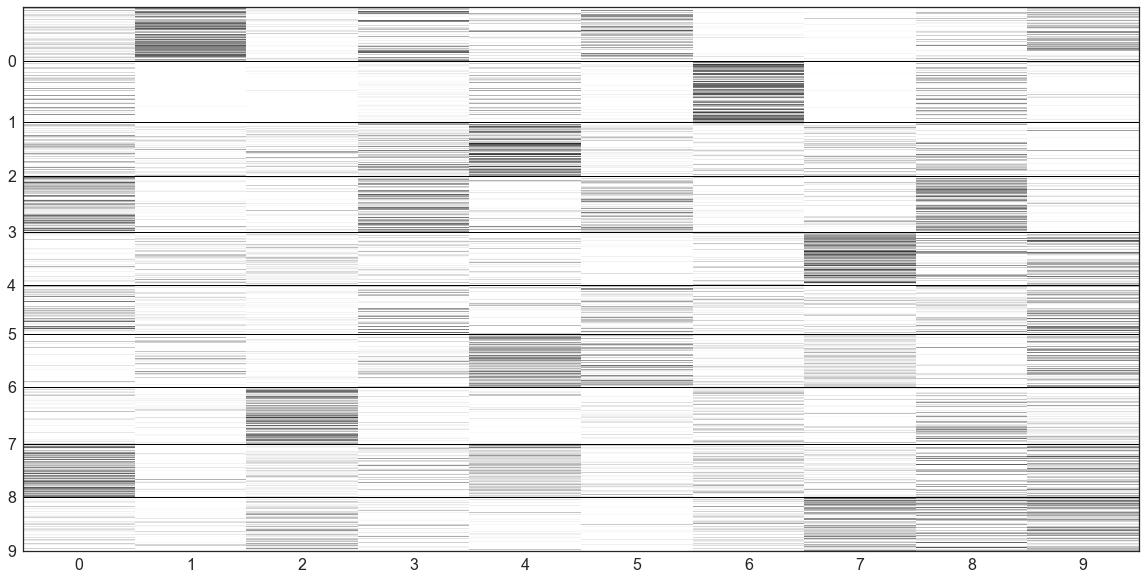

In [12]:
with sns.axes_style('white'):
    fig = plt.figure(figsize=(20, 10))
    plt.imshow(W, aspect='auto', interpolation='nearest')#, cmap='hot')
    ax = plt.gca()
    ax.tick_params(labelsize=16)
    ax.set_xticks(range(k))
    ax.set_xticklabels(range(k))
    ax.set_yticks(yticks)
    ax.set_yticklabels(range(10))
    ax.grid(True, axis='y', color='k', alpha=1, linewidth=1)    

## matrix reconstruction

In [13]:
idxs = pd.concat((pd.Series(yticks).shift(1).fillna(0).astype(int), pd.Series(yticks)), axis=1).values

In [14]:
W_means = np.array([W[sidx:eidx].mean(axis=0) for sidx, eidx in idxs])
W_means.shape

(10, 10)

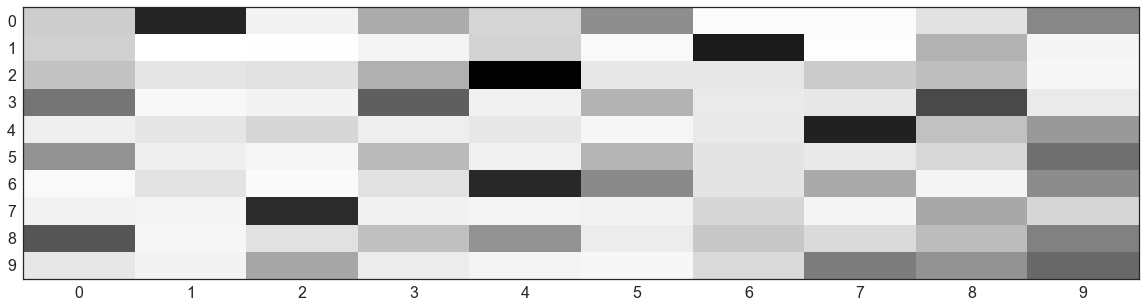

In [15]:
with sns.axes_style('white'):
    fig = plt.figure(figsize=(20, 5))
    plt.imshow(W_means, aspect='auto', interpolation='nearest')#, cmap='hot')
    ax = plt.gca()
    ax.tick_params(labelsize=16)    
    ax.set_xticks(range(k))
    ax.set_xticklabels(range(k))
    ax.set_yticks(range(10))
    ax.set_yticklabels(range(10))

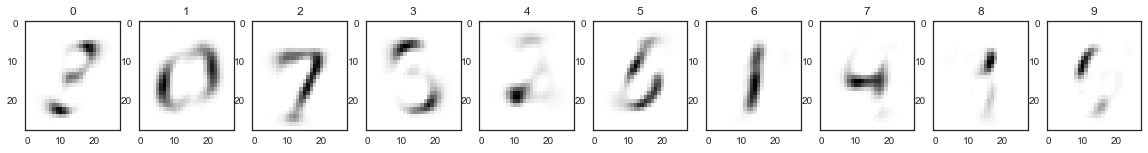

In [16]:
with sns.axes_style('white'):
    fig, axes = plt.subplots(1, 10, figsize=(20, 2))
    for i, (factor, ax) in enumerate(zip(H.T, axes.flatten())):
        ax.imshow(factor.reshape(28, 28), aspect='auto')
        ax.set_title(str(i))

In [17]:
data_means_2 = (W_means).dot(H.T)
data_means_2.shape

(10, 784)

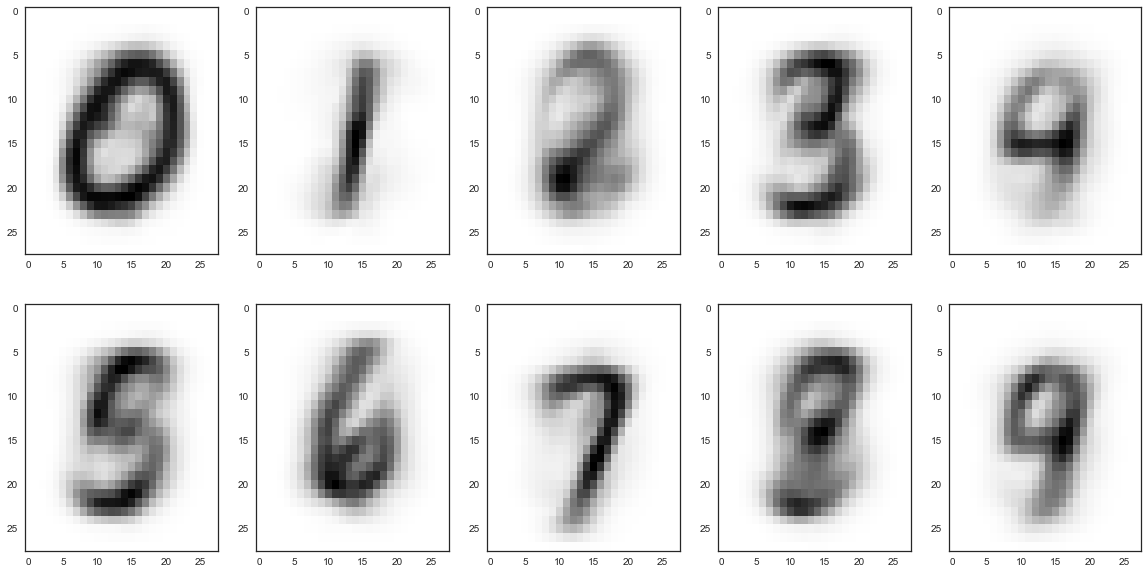

In [18]:
with sns.axes_style('white'):
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    for factor, ax in zip(data_means_2, axes.flatten()):
        ax.imshow(factor.reshape(28, 28), aspect='auto')#, cmap='hot')

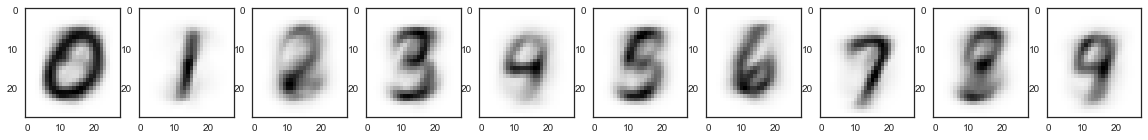

In [19]:
with sns.axes_style('white'):
    fig, axes = plt.subplots(1, 10, figsize=(20, 2))
    for factor, ax in zip(data_means_2, axes.flatten()):
        ax.imshow(factor.reshape(28, 28), aspect='auto')#, cmap='hot')

# tensor factorization

In [20]:
%time factors_3 = non_negative_parafac(data.reshape(70000, 28, 28), k, verbose=1)

reconstruction error=16.772311839020844, variation=0.3259928869608366.
reconstruction error=16.510541059792413, variation=0.2617707792284314.
reconstruction error=16.299686469627854, variation=0.21085459016455843.
reconstruction error=16.128215271961903, variation=0.17147119766595154.
reconstruction error=15.987729790447004, variation=0.14048548151489904.
reconstruction error=15.87177208863746, variation=0.11595770180954368.
reconstruction error=15.775162843328305, variation=0.09660924530915516.
reconstruction error=15.693604435791336, variation=0.08155840753696886.
reconstruction error=15.623541697644928, variation=0.07006273814640807.
reconstruction error=15.562174379145416, variation=0.061367318499511825.
reconstruction error=15.50747178312258, variation=0.05470259602283534.
reconstruction error=15.458052670024204, variation=0.04941911309837721.
reconstruction error=15.41296681315018, variation=0.045085856874024444.
reconstruction error=15.371503942049605, variation=0.04146287110057

In [21]:
A = factors_3[0]
B = factors_3[1]
C = factors_3[2]
A.shape, B.shape, C.shape

((70000, 10), (28, 10), (28, 10))

In [22]:
scales_B = B.max(axis=0) / 16
scales_C = C.max(axis=0) / 16
B /= scales_B
C /= scales_C
A *= scales_B
A *= scales_C
A.max(), B.max(), C.max()

(1.7875070331880609, 16.0, 16.0)

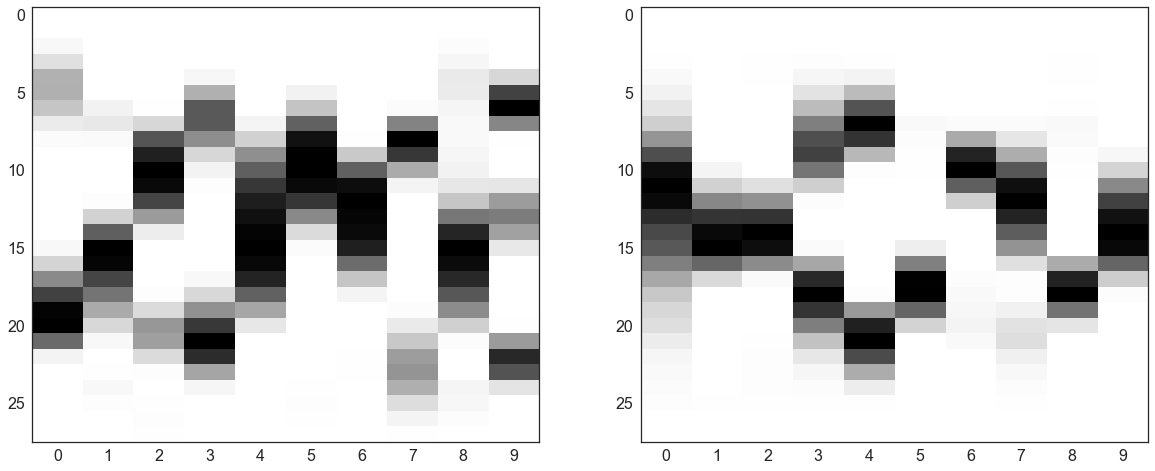

In [23]:
with sns.axes_style('white'):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    ax = axes[0]
    ax.imshow(B, aspect='auto', interpolation='nearest')
    ax.tick_params(labelsize=16)    
    ax.set_xticks(range(k))
    ax.set_xticklabels(range(k))

    ax = axes[1]
    ax.imshow(C, aspect='auto', interpolation='nearest')
    ax.tick_params(labelsize=16)
    ax.set_xticks(range(k))
    ax.set_xticklabels(range(k))    

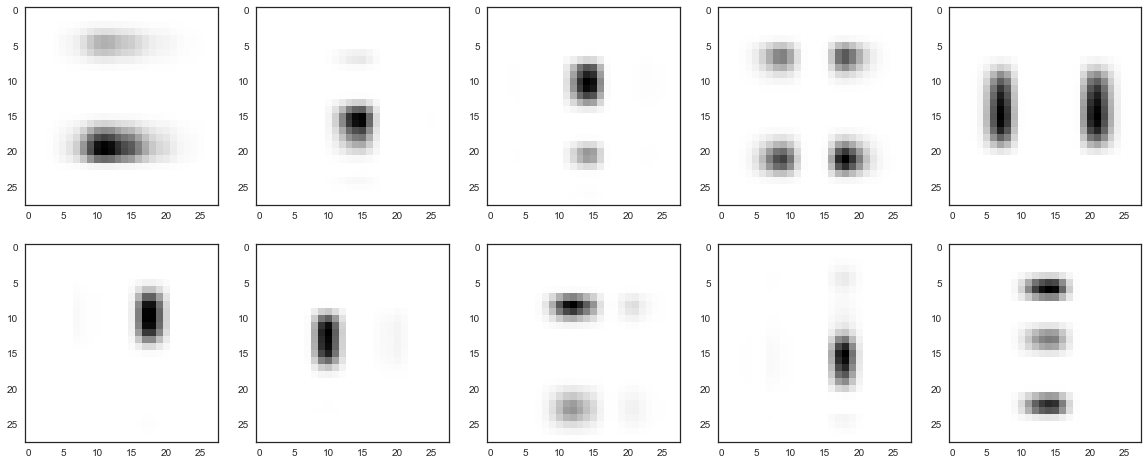

In [24]:
with sns.axes_style('white'):
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    for b, c, ax in zip(B.T, C.T, axes.flatten()):
        ax.imshow(np.outer(b, c), aspect='auto', interpolation='nearest')

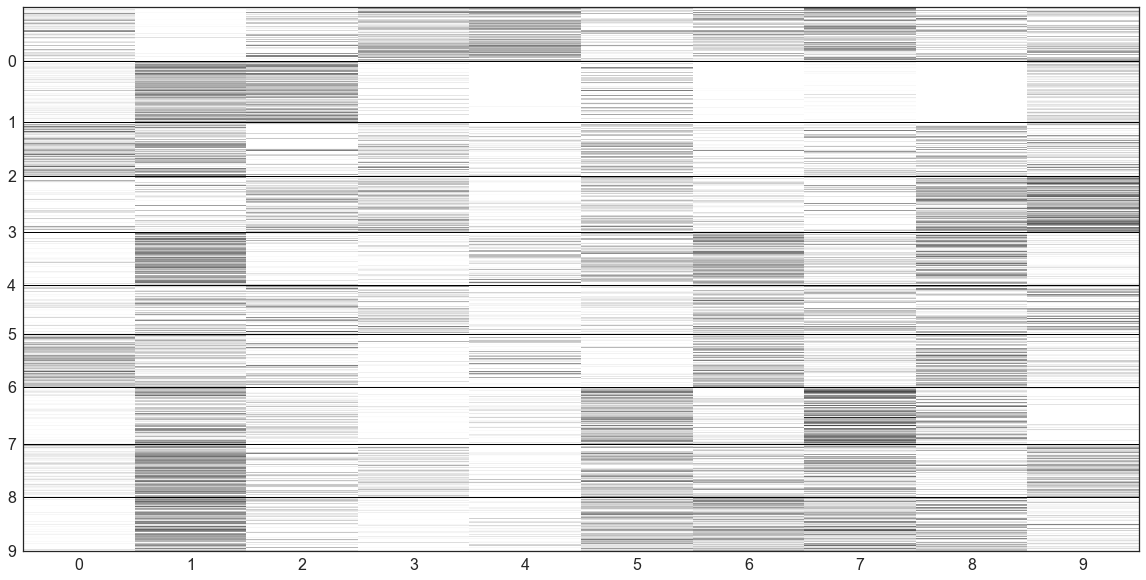

In [25]:
yticks = pd.Series(target).value_counts().sort_index().values.cumsum()
with sns.axes_style('white'):
    fig = plt.figure(figsize=(20, 10))
    plt.imshow(A, aspect='auto', interpolation='nearest')#, cmap='hot')
    ax = plt.gca()
    ax.tick_params(labelsize=16)    
    ax.set_xticks(range(k))
    ax.set_xticklabels(range(k))
    ax.set_yticks(yticks)
    ax.set_yticklabels(range(10))
    ax.grid(True, axis='y', color='k', alpha=1, linewidth=1)    

In [26]:
A_means = np.array([A[sidx:eidx].mean(axis=0) for sidx, eidx in idxs])
A_means.shape

(10, 10)

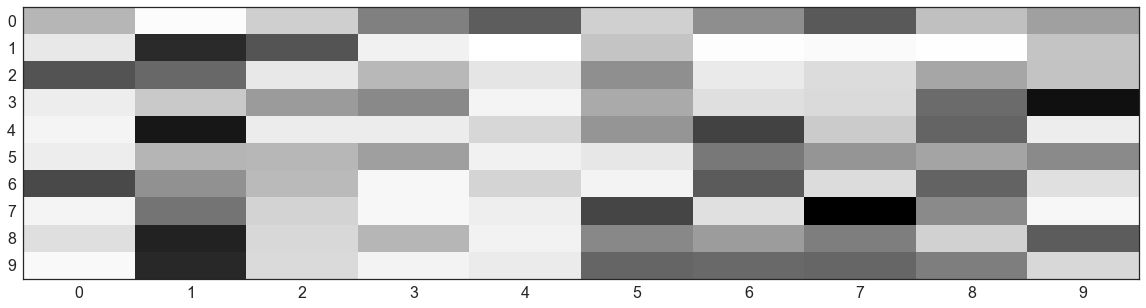

In [27]:
with sns.axes_style('white'):
    fig = plt.figure(figsize=(20, 5))
    plt.imshow(A_means, aspect='auto', interpolation='nearest')#, cmap='hot')
    ax = plt.gca()
    ax.tick_params(labelsize=16)        
    ax.set_xticks(range(k))
    ax.set_xticklabels(range(k))
    ax.set_yticks(range(10))
    ax.set_yticklabels(range(10))

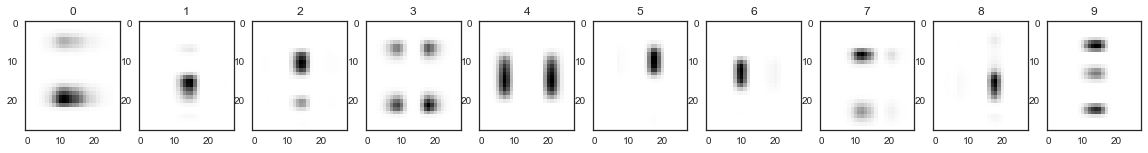

In [28]:
with sns.axes_style('white'):
    fig, axes = plt.subplots(1, 10, figsize=(20, 2))
    for i, (b, c, ax) in enumerate(zip(B.T, C.T, axes.flatten())):
        ax.imshow(np.outer(b, c), aspect='auto', interpolation='nearest')
        ax.set_title(str(i))

In [29]:
data_means_3 = tl.kruskal_to_tensor((A_means, B, C))
data_means_3.shape

(10, 28, 28)

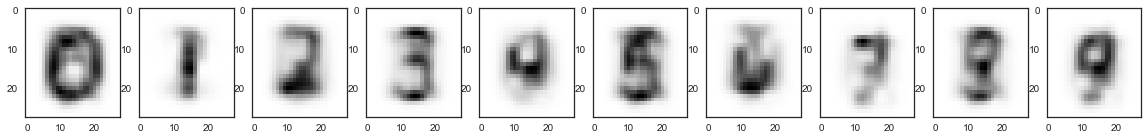

In [30]:
with sns.axes_style('white'):
    fig, axes = plt.subplots(1, 10, figsize=(20, 2))
    for factor, ax in zip(data_means_3, axes.flatten()):
        ax.imshow(factor, aspect='auto')